In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def quadraticElements(N, koef, f, T1, T2):
    assert N%2 > 0
    M = (N - 1) //2
    h = 1/M
    l = np.zeros((3, M), dtype = np.int32)
    for i in range(3):
        for k in range(M):
            l[i, k] = 2 * k  + i
    a = np.array([[7, -8, 1], [-8, 16, -8], [1, -8, 7]])/3/h
    load_matrix = np.zeros((N, N))
    for k in range(M):
        for i in range(3):
            for j in range(3):
                load_matrix[l[i, k], l[j, k]] += koef[l[2, k]] * a[i, j]
    
    F = np.zeros((3, N))
    for k in range(M):
        F[0, k] = 4 * f[l[0, k]] + 2 * f[l[1, k]] - f[l[2, k]]
        F[1, k] = 2 * f[l[0, k]] + 16 * f[l[1, k]] + 2 * f[l[2, k]]
        F[2, k] = -1 * f[l[0, k]] + 2 * f[l[1, k]] + 4 * f[l[2, k]]
    F *= h/30
    
    load_vect = np.zeros(N)
    for k in range(M):
        for i in range(3):
            load_vect[l[i, k]] += F[i, k]
    
    load_matrix[0, 0] = 1; load_matrix[0, 1:] = 0
    load_vect[0] = T1
    
    load_matrix[-1, -1] = 1; load_matrix[-1, :-1] = 0
    load_vect[-1] = T2
    return np.linalg.solve(load_matrix, load_vect)

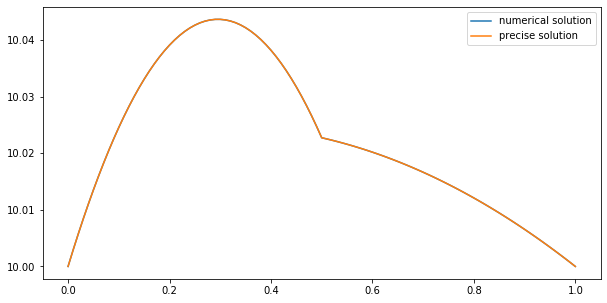

In [30]:
#тест по предыдущему заданию
def preciseSolution(k1, k2, f1, f2, T1, T2, x):
    matrix = np.array([[1 * k1, 0, -1 * k2, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0.5, 1, -0.5, -1]])
    vect = np.array([0.5*(f1 - f2), T1, T2 + f2/2/k2, -(f2/k2- f1/k1)/8])
    const = np.linalg.solve(matrix, vect)
    sol = [ -f1/2/k1 * x**2 + const[0] * x + const[1] if x <= 0.5 else -f2/2/k2 * x**2 + const[2] * x + const[3] for x in x]
    return sol

N = 101; f1 = 1; k1 = 1; f2 = 1; k2 = 10; T1 = 10; T2 = 10
x = np.linspace(0, 1, N)
f = [f1 if x[i] <= 0.5 else f2 for i in range(N)]
koef = np.array([k1 if x[i] <= 0.5 else k2 for i in range(N)])
sol =  quadraticElements(N, koef, f, T1, T2)
pres_sol = preciseSolution(k1, k2, f1, f2, T1, T2, x)
plt.figure(figsize = (10, 5))
plt.plot(x, sol, label = "numerical solution")
plt.plot(x, pres_sol, label = "precise solution")
plt.legend()

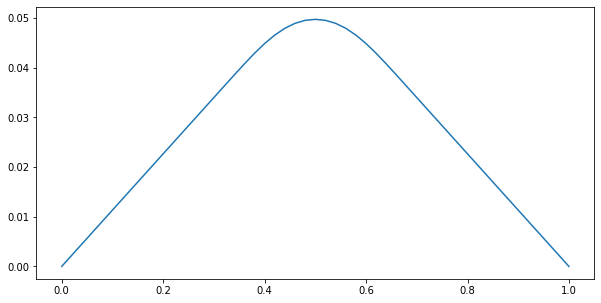

In [31]:
N = 51
x = np.linspace(0, 1, N)
f = np.array(list(map(lambda x: np.exp(-(4 - 8 * x)**4), x)))
koef = np.ones(N)
sol =  quadraticElements(N, koef, f, T1 = 0, T2 = 0)
plt.figure(figsize = (10, 5))
plt.plot(x, sol, label = "numerical solution")